In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# Analysis of user churn data for a telecom company

## Data preparing

In [179]:
df = pd.read_csv("train.csv")
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [180]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

No null values. But TotalSpent has type object which is strange

#### Little data clearing

In [182]:
# Find not numbers in TotalSpent
a = {}
for i in range(5282):
    try:
        x = float(df['TotalSpent'][i])
    except:
        a[i] = df['TotalSpent'][i]
a

{1048: ' ',
 1707: ' ',
 2543: ' ',
 3078: ' ',
 3697: ' ',
 4002: ' ',
 4326: ' ',
 4551: ' ',
 4598: ' '}

In [183]:
df.iloc[list(a.keys()), :]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


All this strings have 0 in ClientPeriod

In [184]:
sum(df.loc[:, ['ClientPeriod']].values == 0)

array([9])

And they are the only strings which have 0 in ClientPeriod

It can be concluded that ' ' in TotalSpent means that TotalSpent is equal 0

In [185]:
# Change ' ' in TotalSpent to 0
df['TotalSpent'][df['TotalSpent'] == ' '] = 0
df['TotalSpent'] = df['TotalSpent'].astype(float)

<ipython-input-185-bdc7b8e4e4af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpent'][df['TotalSpent'] == ' '] = 0


#### Transformations

In [186]:
old = df.copy() #We will need it later

Look what values categorical columns have

In [187]:
for col_name in cat_cols:
    print(col_name)
    print(df[col_name].unique())
    print()

Sex
['Male' 'Female']

IsSeniorCitizen
[0 1]

HasPartner
['Yes' 'No']

HasChild
['Yes' 'No']

HasPhoneService
['Yes' 'No']

HasMultiplePhoneNumbers
['No' 'Yes' 'No phone service']

HasInternetService
['No' 'Fiber optic' 'DSL']

HasOnlineSecurityService
['No internet service' 'No' 'Yes']

HasOnlineBackup
['No internet service' 'No' 'Yes']

HasDeviceProtection
['No internet service' 'No' 'Yes']

HasTechSupportAccess
['No internet service' 'Yes' 'No']

HasOnlineTV
['No internet service' 'No' 'Yes']

HasMovieSubscription
['No internet service' 'No' 'Yes']

HasContractPhone
['One year' 'Two year' 'Month-to-month']

IsBillingPaperless
['No' 'Yes']

PaymentMethod
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']



Most of categorical columns may be reformatted to int64 without loss of data

In [188]:
yes_or_no_cols = [
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'IsBillingPaperless',
]

In [189]:
# Make data easier to analyse and use for machine learning
df[yes_or_no_cols] = (df[yes_or_no_cols] == 'Yes').astype(int)
df['Sex'] = (df['Sex'] == 'Male').astype(int)

Object parameter HasContractPhone can be changed to int64 ContractDuration

In [190]:
df['HasContractPhone'][df['HasContractPhone'] == 'Month-to-month'] = 0  
df['HasContractPhone'][df['HasContractPhone'] == 'One year'] = 1
df['HasContractPhone'][df['HasContractPhone'] == 'Two year'] = 2
new_columns = list(df.columns)
new_columns[-4] = 'ContractDuration'
df.columns = new_columns
df['ContractDuration'] = df['ContractDuration'].astype(int)

<ipython-input-190-c1b4fa451a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasContractPhone'][df['HasContractPhone'] == 'Month-to-month'] = 0
<ipython-input-190-c1b4fa451a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasContractPhone'][df['HasContractPhone'] == 'One year'] = 1
<ipython-input-190-c1b4fa451a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasContractPhone'][df['HasContractPhone'] == 'Two yea

Let's create an additional parameter showing how many services of the company every customer uses

In [191]:
serv = [
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasInternetService',
]

In [192]:
df[['InternetService']] = df[['HasInternetService']]
df[['HasInternetService']] = (df[['HasInternetService']] != 'No').astype(int)
df['NumberOfServices'] = df[serv].sum(axis=1)
old['NumberOfServices'] = df['NumberOfServices']
num_cols.append('NumberOfServices')

In [193]:
#Rearrange columns order a bit
cols = df.columns.tolist()
cols = cols[:-3] + cols[-2:]+ cols[-3:-2]
df = df[cols]
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,ContractDuration,IsBillingPaperless,PaymentMethod,InternetService,NumberOfServices,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,0,0,0,0,1,0,Mailed check,No,1,0
1,72,25.85,1872.20,1,0,1,0,1,1,0,...,0,0,0,0,2,0,Credit card (automatic),No,2,0
2,1,75.90,75.90,1,0,0,0,1,0,1,...,0,1,0,0,0,1,Electronic check,Fiber optic,3,1
3,32,79.30,2570.00,0,1,1,0,1,1,1,...,1,0,0,0,0,0,Mailed check,Fiber optic,4,0
4,60,115.25,6758.45,0,0,1,1,1,1,1,...,1,1,1,1,2,0,Credit card (automatic),Fiber optic,9,0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   int64  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int64  
 6   HasChild                  5282 non-null   int64  
 7   HasPhoneService           5282 non-null   int64  
 8   HasMultiplePhoneNumbers   5282 non-null   int64  
 9   HasInternetService        5282 non-null   int64  
 10  HasOnlineSecurityService  5282 non-null   int64  
 11  HasOnlineBackup           5282 non-null   int64  
 12  HasDeviceProtection       5282 non-null   int64  
 13  HasTechSupportAccess      5282 non-null   int64  
 14  HasOnlin

Now there is only two object columns. It makes data more convenient for a range of analysis types

## Data overview

Start with representing some information about numeric columns

In [195]:
df[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent,NumberOfServices
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,4.156191
std,24.550326,30.176464,2269.049195,2.317374
min,0.000000,18.250000,0.000000,1.000000
25%,9.000000,35.462500,395.725000,2.000000
50%,29.000000,70.400000,1405.650000,4.000000
75%,55.000000,90.050000,3795.212500,6.000000
max,72.000000,118.750000,8684.800000,9.000000


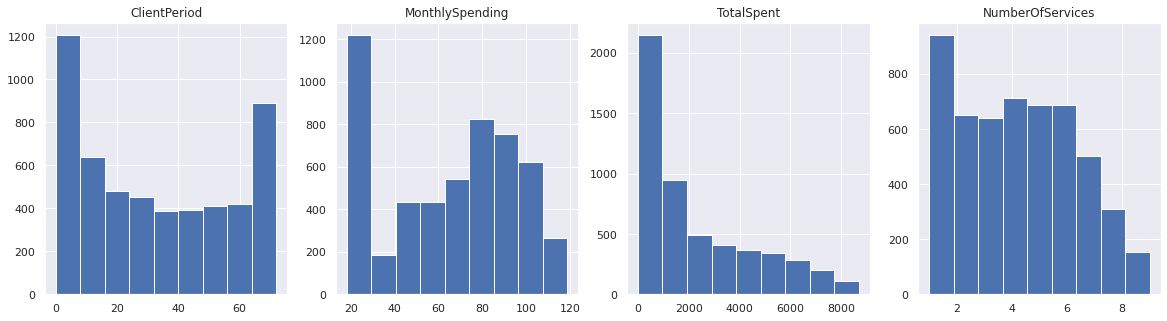

In [196]:
fig, axis = plt.subplots(1, 4, figsize=(20,5))
for i in range(len(num_cols)):
    axis[i].hist(df[num_cols[i]], bins=9)
    axis[i].set_title(num_cols[i])
plt.show()

Then some information about categorical columns

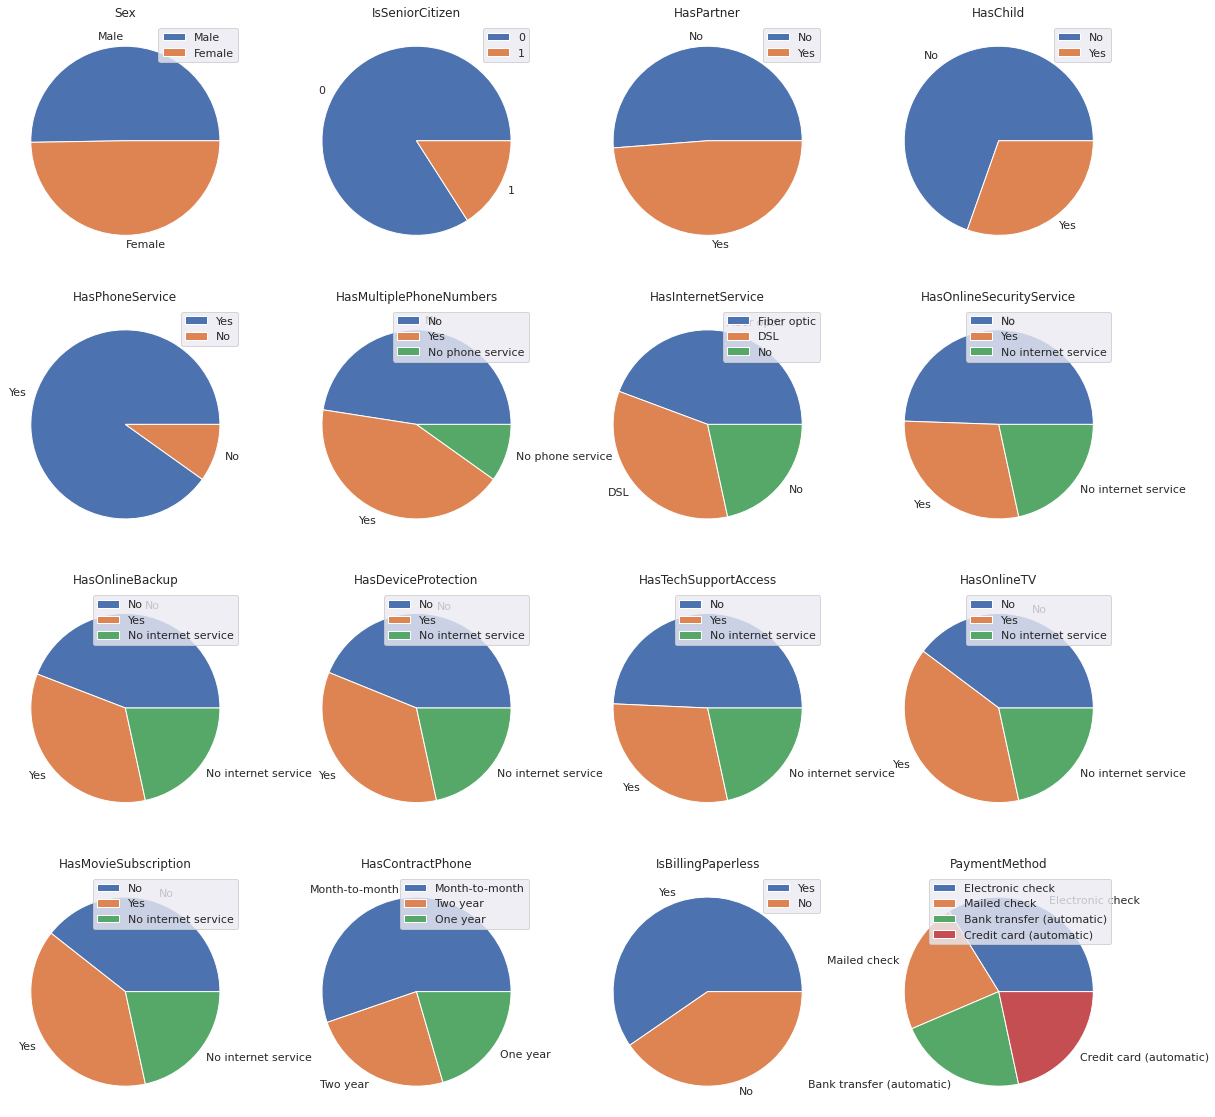

In [197]:

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.ravel()
for i, cat_col in enumerate(cat_cols):
    ax[i].set_title(cat_col)
    ax[i].pie(old[cat_col].value_counts(), labels=old[cat_col].value_counts().index)
    ax[i].legend()
fig.show()

And a bit about target column

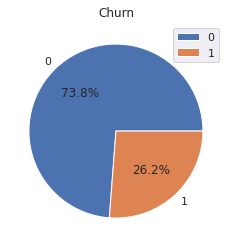

3898 of customers stayed with firm, 1384 left


In [198]:
fig, ax = plt.subplots()
ax.set_title(target_col)
ax.pie(df[target_col].value_counts(), autopct='%1.1f%%', labels=df[target_col].value_counts().index)
ax.legend()
plt.show()
d = dict(df[target_col].value_counts())
print(f'{d[0]} of customers stayed with firm, {d[1]} left')

## Data comparison

Start with pairplot as it gives some general overview about how columns are connected

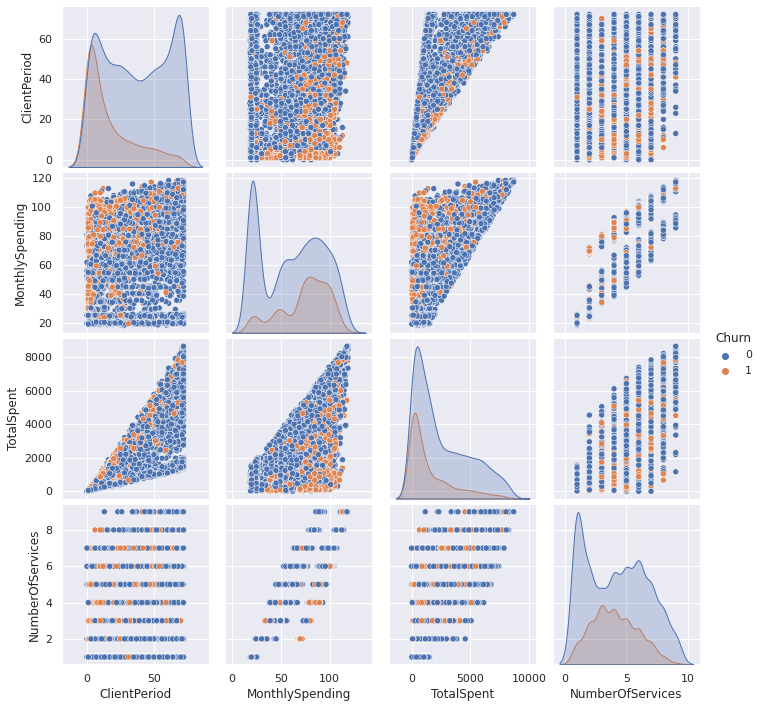

In [199]:
f = sns.pairplot(data=df[num_cols+[target_col]],hue=target_col)

We can see that in ClientPeriod-MonthlySpending chart blue and orange points are located in different parts, so let's check how relation between ClientPeriod and MonthlySpending depands on whether client left the firm or not

Text(0.5, 1.0, 'Left the firm')

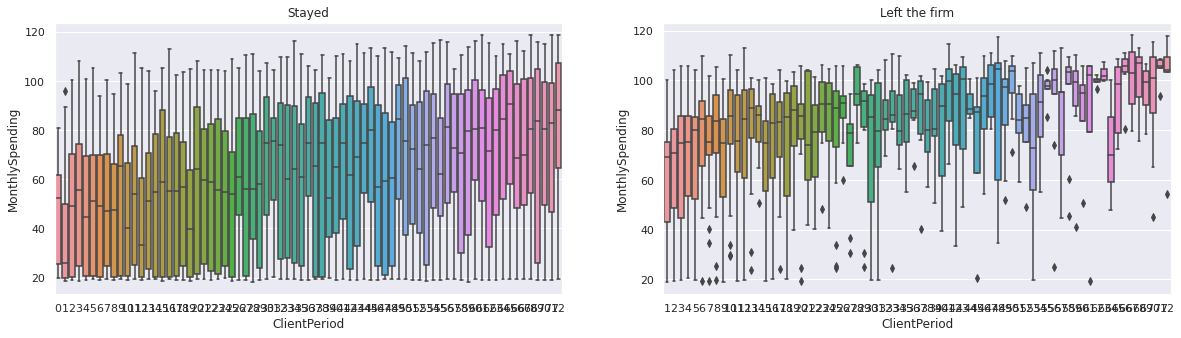

In [200]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(data=df[df['Churn']==0],x='ClientPeriod', y='MonthlySpending',ax=ax[0])
ax[0].set_title('Stayed')
sns.boxplot(data=df[df['Churn']==1],x='ClientPeriod', y='MonthlySpending',ax=ax[1])
ax[1].set_title('Left the firm')

It can be concluded that for every value of ClientPeriod MonthlySpendings of those who left the firm were on average noticeably higher than of those who stayed

The next chart shows this pattern even more clear. Orange and blue lines are parallel, and orange lies 20 points higher. It is a very valuable result

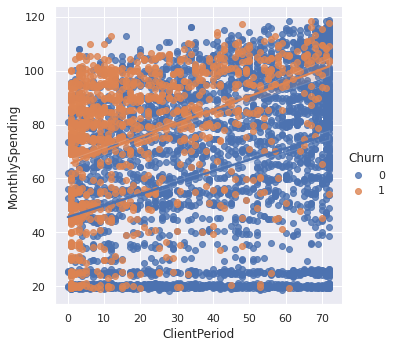

In [201]:
sns.lmplot(data=df,x='ClientPeriod', y='MonthlySpending',hue='Churn')

Also we see that, in general, the more ClientPeriod, the more MonthlySpendings


Now, something about correlation

In [202]:
f = df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
f

<ipython-input-202-4af5d3aa2fe8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  f = df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,ContractDuration,IsBillingPaperless,NumberOfServices,Churn
ClientPeriod,1.00,0.25,0.83,0.01,0.01,0.37,0.15,0.01,0.33,0.04,0.33,0.36,0.36,0.32,0.28,0.29,0.67,0.01,0.48,-0.35
MonthlySpending,0.25,1.00,0.65,-0.01,0.22,0.09,-0.13,0.25,0.49,0.76,0.30,0.44,0.48,0.33,0.63,0.63,-0.07,0.34,0.85,0.18
TotalSpent,0.83,0.65,1.00,0.01,0.09,0.31,0.05,0.12,0.47,0.38,0.42,0.51,0.53,0.43,0.51,0.53,0.45,0.16,0.78,-0.20
Sex,0.01,-0.01,0.01,1.00,0.01,0.00,0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.02,-0.02,-0.01,-0.01,-0.02,-0.02,-0.01
IsSeniorCitizen,0.01,0.22,0.09,0.01,1.00,0.02,-0.22,0.01,0.14,0.18,-0.04,0.07,0.05,-0.05,0.10,0.12,-0.15,0.15,0.12,0.16
HasPartner,0.37,0.09,0.31,0.00,0.02,1.00,0.44,0.00,0.13,-0.00,0.14,0.13,0.15,0.12,0.12,0.12,0.29,-0.01,0.19,-0.15
HasChild,0.15,-0.13,0.05,0.01,-0.22,0.44,1.00,-0.01,-0.03,-0.15,0.08,0.02,0.00,0.06,-0.02,-0.03,0.24,-0.10,-0.02,-0.16
HasPhoneService,0.01,0.25,0.12,-0.01,0.01,0.00,-0.01,1.00,0.28,-0.17,-0.10,-0.04,-0.07,-0.10,-0.02,-0.03,0.00,0.02,0.09,0.01
HasMultiplePhoneNumbers,0.33,0.49,0.47,-0.00,0.14,0.13,-0.03,0.28,1.00,0.20,0.11,0.20,0.20,0.09,0.25,0.26,0.11,0.16,0.52,0.04
HasInternetService,0.04,0.76,0.38,-0.01,0.18,-0.00,-0.15,-0.17,0.20,1.00,0.34,0.38,0.38,0.34,0.42,0.42,-0.24,0.31,0.66,0.23


1) TotalSpent strongly correlate both ClientPeriod and MonthlySpending which is not surprizing at all


2) We can assume that clients with larger ClientPeriod tend to have more long-term contracts

3) It can be noticed that clients with long ClientPeriod or long-term contract are less likely to leave the firm


4) Sex correlate with nothing


Actually, there is a lot of what can be concluded from this wonderful table, but let's stop here

The next charts confirms point 2 and partly confirm point 4

In [203]:
df1 = df[df['Sex']==1]
df2 = df[df['Sex']==0]
cond = [df['ContractDuration']==0, df['ContractDuration']==1, df['ContractDuration']==2]
titl = ['Month-to-month', 'One year', 'Two years']

<ipython-input-204-d0c9d0fff056>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axis[j].hist([df1[cond[j]]['ClientPeriod'],df2[cond[j]]['ClientPeriod']], bins=9)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


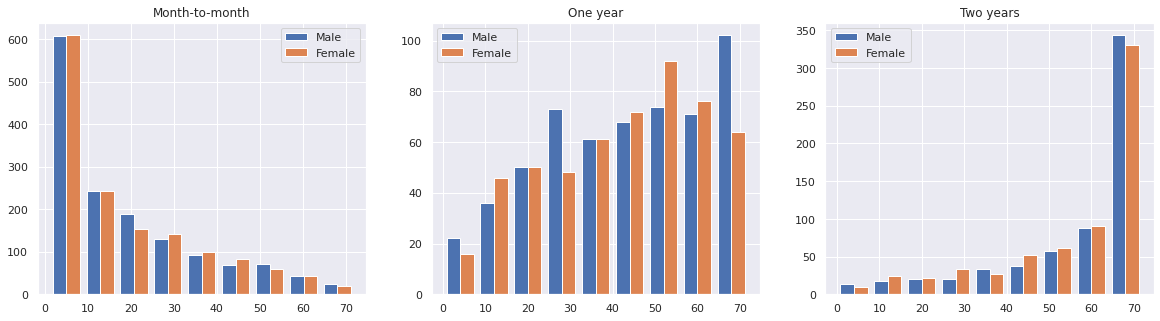

In [204]:
fig, axis = plt.subplots(1,3, figsize=(20,5))
for j in range(3):
    axis[j].hist([df1[cond[j]]['ClientPeriod'],df2[cond[j]]['ClientPeriod']], bins=9)
    axis[j].legend(['Male','Female'])
    axis[j].set_title(titl[j])
plt.show()

## Last data comparison

>Churn has negative correlation with parameters HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection and HasTechSupportAccess. It is possible to put forward a **hypothesis** that the more serveces client has, the less chance that he leave the firm. Moreover, considering correlation coafficients of Churn with IsSeniorCitizen and HasPartner, we may assume that relatevely young married people even less likely to leave the firm for every value of Number of serveces

In [205]:
dfss = df[(df['IsSeniorCitizen'] == 1) & (df['HasPartner'] == 0)]
dfsm = df[(df['IsSeniorCitizen'] == 1) & (df['HasPartner'] == 1)]
dfys = df[(df['IsSeniorCitizen'] == 0) & (df['HasPartner'] == 0)]
dfym = df[(df['IsSeniorCitizen'] == 0) & (df['HasPartner'] == 1)]

dss= []
dsm = []
dys= []
dym = []
d = []
for i in range(1,10):
    dfi = dfss[df['NumberOfServices'] == i]['Churn']
    dss.append(sum(list(dfi))/len(dfi))
for i in range(1,10):
    dfi = dfsm[df['NumberOfServices'] == i]['Churn']
    dsm.append(sum(list(dfi))/len(dfi))
for i in range(1,10):
    dfi = dfys[df['NumberOfServices'] == i]['Churn']
    dys.append(sum(list(dfi))/len(dfi))
for i in range(1,10):
    dfi = dfym[df['NumberOfServices'] == i]['Churn']
    dym.append(sum(list(dfi))/len(dfi))
for i in range(1,10):
    dfi = df[df['NumberOfServices'] == i]['Churn']
    d.append(sum(list(dfi))/len(dfi))

<ipython-input-205-0ff61d4cf3cc>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfi = dfss[df['NumberOfServices'] == i]['Churn']
<ipython-input-205-0ff61d4cf3cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfi = dfsm[df['NumberOfServices'] == i]['Churn']
<ipython-input-205-0ff61d4cf3cc>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfi = dfys[df['NumberOfServices'] == i]['Churn']
<ipython-input-205-0ff61d4cf3cc>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfi = dfym[df['NumberOfServices'] == i]['Churn']


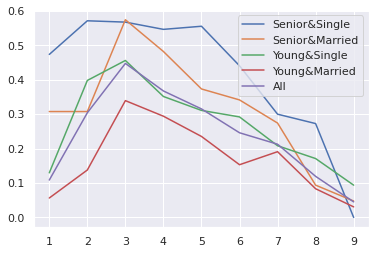

In [206]:
l1 = plt.plot(range(1,10), dss)
l2 = plt.plot(range(1,10), dsm)
l3 = plt.plot(range(1,10), dys)
l4 = plt.plot(range(1,10), dym)
l5 = plt.plot(range(1,10), d)
plt.legend(['Senior&Single','Senior&Married','Young&Single','Young&Married','All'])

The hypotesis was partly confirmd. We knew that function showing ratio of left depending on NumberOfServices has form of mountine with pike at 3 purchaced surveces. Young and Married people are actually less likely to leave a firm for every value of NumberOfServices